### corpusへのpseudo-labelがイケてそうか確認 --

* 短いやつは自然と判定外になりそう

In [62]:
import pandas as pd
from glob import glob

from bert_utils import *

In [63]:
paths = glob("./input/corpus_label_roberta_large_cat4/*.feather")

In [64]:
pd.set_option("display.max_colwidth", -1)
pd.set_option("display.max_rows", 20000)
dfs = []
for path in paths:
    df = pd.read_feather(path)
    df = df[df["model_pred"] == 1]
    dfs.append(df)

df = pd.concat(dfs)

<AxesSubplot: >

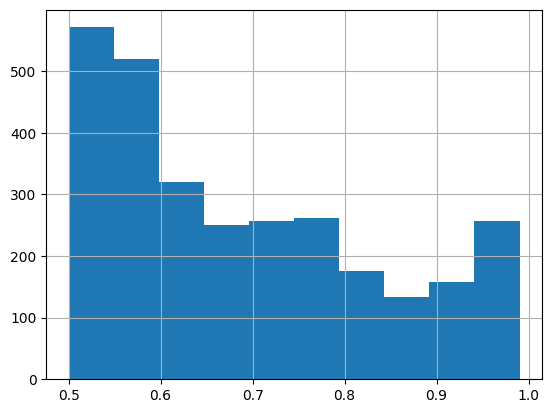

In [69]:
df["model_oof_class_1"].hist()

In [65]:
Debug_print(df.shape)
df.drop_duplicates(subset=["clean_text"]).sort_values("model_oof_class_1", ascending=False)

(2903, 6)


,id,source,clean_text,model_pred,model_oof_class_0,model_oof_class_1
3402,newsplus_23882,newsplus,朝鮮人を絶滅させろ!!,1,0.009818,0.990182
202776,news4vip_612376,news4vip,朝鮮人は自分の国に帰れ,1,0.010349,0.989651
145723,newsplus_371003,newsplus,朝鮮人特有の目つきだよね日本語をしゃべって日本人に擬態する卑劣な密入国居座り嘘つき犯罪テロ民族,1,0.011080,0.988920
67834,newsplus_88314,newsplus,朝鮮人て常に誰かを敵にしないと生きていけない哀れな民族性だよな,1,0.011949,0.988051
182049,newsplus_202529,newsplus,朝鮮人を殲滅すると世界が明るくなりそうだね!,1,0.012169,0.987831
80603,newsplus_101083,newsplus,朝鮮人は戦争に備えて祖国に帰れよ,1,0.012209,0.987791
72640,newsplus_297920,newsplus,朝鮮人の価値観を押し付けるなってw日本のシステムが嫌なら祖国に帰れよなキムチ悪いわ,1,0.012274,0.987726
56261,newsplus_76741,newsplus,朝鮮人は朝鮮半島に隔離せよ,1,0.012457,0.987543
46212,newsplus_271492,newsplus,朝鮮人は国帰れ,1,0.012516,0.987484
63438,newsplus_288718,newsplus,朝鮮人は地獄の鬼や魔界の悪魔以下の存在,1,0.012892,0.987108


In [66]:
corpus_list = glob("./input/*.feather")

corpus_dfs = []
for path in corpus_list:
    corpus_dfs.append(pd.read_feather(path))

In [67]:
corpus_df = pd.concat(corpus_dfs)

In [68]:
corpus_df.reset_index(drop=False).groupby("source").head(1)

,index,source,clean_text
0,0,news4vip,医者ああ正常なコミュニケーションが取れてませんねえ・・・医者月一で病院に来てください申請しますのでマジでこんなのだからな
4784307,0,newsplus,八紘一宇に共感するファシストどもや自衛隊合憲論という詭弁を弄して改憲運動を潰し支那朝鮮を支援してきた日本のゲスに朝鮮人は感謝しないとな彼ら日本の売国奴がいなければ朝鮮は経済的にも19世紀のままだった
5239054,0,livejupiter,実況スレをたてる


(2903, 6)